# numpy数据操作

## 读取数据

In [15]:
# numpy读取数据

# np.loadtxt(
#     fname,                  文件、字符串或产生器地址, 也可以是压缩文件
#     dtype=np.float,         数据类型, 可选, 即确认csv的字符串以什么数据类型读入数组中, 默认为np.float
#     delimiter=None,         分割读取的字符串, 默认是空格, 读取csv时通常改为逗号
#     skiprows=0,             跳过前x行, 一般可以设置为跳过第一行表头
#     usecols=None,           读取指定的列, 索引, 元组类型
#     unpack=False            如果True, 读入属性将分别写入不同数组变量, Flase读入数据只写入一个数组变量, 默认False
#     )

In [16]:
import numpy as np

us_file_path = "./youtube_video_data/US_video_data_numbers.csv"
uk_file_path = "./youtube_video_data/GB_video_data_numbers.csv"

t1 = np.loadtxt(us_file_path, dtype="int", delimiter=",")
print(t1, '\n')

# 从结果可以看出unpack的效果是对读取结果进行转置
t2 = np.loadtxt(us_file_path, dtype="int", delimiter=",", unpack=True)
print(t2)

[[4394029  320053    5931   46245]
 [7860119  185853   26679       0]
 [5845909  576597   39774  170708]
 ...
 [ 142463    4231     148     279]
 [2162240   41032    1384    4737]
 [ 515000   34727     195    4722]] 

[[4394029 7860119 5845909 ...  142463 2162240  515000]
 [ 320053  185853  576597 ...    4231   41032   34727]
 [   5931   26679   39774 ...     148    1384     195]
 [  46245       0  170708 ...     279    4737    4722]]


In [17]:
# 转置的两种方法
t1 = np.array([
    [0, 1, 2, 3],
    [4, 5, 6, 7],
    [8, 9, 10, 11]
])
t1 = t1.transpose()
print(t1, '\n')

t2 = np.array([
    [0, 1, 2, 3],
    [4, 5, 6, 7],
    [8, 9, 10, 11]
])
t2 = t2.swapaxes(1, 0)
print(t2)

[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]] 

[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


## 索引和切片

In [18]:
t1 = np.loadtxt(us_file_path, dtype="int", delimiter=",")
print(t1)

print("*"*50)
# 取第3行
# t[2, :]和t[2]等价, 当后面全选时可以不写出来
print(t1[2, :])
print(t1[2])

print("*"*50)
# 取连续的多行
print(t1[2:])
# 等价于print(t1[2:, :])

print("*"*50)
# 取不连续的多行
print(t1[[2, 8, 10]])
# 等价于print(t1[[2, 8, 10], :])


[[4394029  320053    5931   46245]
 [7860119  185853   26679       0]
 [5845909  576597   39774  170708]
 ...
 [ 142463    4231     148     279]
 [2162240   41032    1384    4737]
 [ 515000   34727     195    4722]]
**************************************************
[5845909  576597   39774  170708]
[5845909  576597   39774  170708]
**************************************************
[[5845909  576597   39774  170708]
 [2642103   24975    4542   12829]
 [1168130   96666     568    6666]
 ...
 [ 142463    4231     148     279]
 [2162240   41032    1384    4737]
 [ 515000   34727     195    4722]]
**************************************************
[[5845909  576597   39774  170708]
 [1338533   69687     678    5643]
 [ 859289   34485     726    1914]]


In [19]:
print(t1)
print("*"*50)

# 取第0列
print(t1[:, 0])

print("*"*50)
# 取连续多列
print(t1[:, 2:])

print("*"*50)
# 取不连续多列
print(t1[:, [0, 2]])

print("*"*50)
# 取特定行列的值, 取第3行第4列的值
print(t1[2, 3], type(t1[2, 3]))

print("*"*50)
# 取多行多列, 取第3-5行, 第2-4列的结果, 左闭右开区间
print(t1[2:5, 1:4])

print("*"*50)
# 取不相连的多个点
# [横坐标列表, 纵坐标列表]
print(t1[[0, 2], [0, 3]])

[[4394029  320053    5931   46245]
 [7860119  185853   26679       0]
 [5845909  576597   39774  170708]
 ...
 [ 142463    4231     148     279]
 [2162240   41032    1384    4737]
 [ 515000   34727     195    4722]]
**************************************************
[4394029 7860119 5845909 ...  142463 2162240  515000]
**************************************************
[[  5931  46245]
 [ 26679      0]
 [ 39774 170708]
 ...
 [   148    279]
 [  1384   4737]
 [   195   4722]]
**************************************************
[[4394029    5931]
 [7860119   26679]
 [5845909   39774]
 ...
 [ 142463     148]
 [2162240    1384]
 [ 515000     195]]
**************************************************
170708 <class 'numpy.int64'>
**************************************************
[[576597  39774 170708]
 [ 24975   4542  12829]
 [ 96666    568   6666]]
**************************************************
[4394029  170708]


In [20]:
# 布尔索引, 条件筛选
t2 = np.arange(24).reshape((4, 6))
print(t2)

print("*"*50)
# 布尔表达式负责筛选
print(t2<10)

print("*"*50)
t2[t2<10] = 3
print(t2)

print("*"*50)
print(t2[t2>20])

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
**************************************************
[[ True  True  True  True  True  True]
 [ True  True  True  True False False]
 [False False False False False False]
 [False False False False False False]]
**************************************************
[[ 3  3  3  3  3  3]
 [ 3  3  3  3 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
**************************************************
[21 22 23]


In [21]:
t3 = np.arange(24).reshape((4, 6))
# 想把t中小于10的数字替换为0, 把大于10的替换为10
# 三元运算符
t3 = np.where(t3<10, 0, 10)
print(t2)

[[ 3  3  3  3  3  3]
 [ 3  3  3  3 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [22]:
# 想把t中小于10的数字替换为10, 把大于20的替换为20
# 如果用bool三元操作需要两行
# 可以使用clip裁剪操作, 即裁剪掉高的那部分和低的那部分, 留下中间的部分
# clip(a, b) 裁剪掉小于a的和大于b的
t4 = np.arange(24).reshape((4, 6))
print(t4)
print("*"*50)
t4 = t4.clip(10, 20)
print(t4)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
**************************************************
[[10 10 10 10 10 10]
 [10 10 10 10 10 11]
 [12 13 14 15 16 17]
 [18 19 20 20 20 20]]


英国和美国各自youtube1000的数据结合之前的matplotlib绘制出各自的评论数量的直方图

582624 0


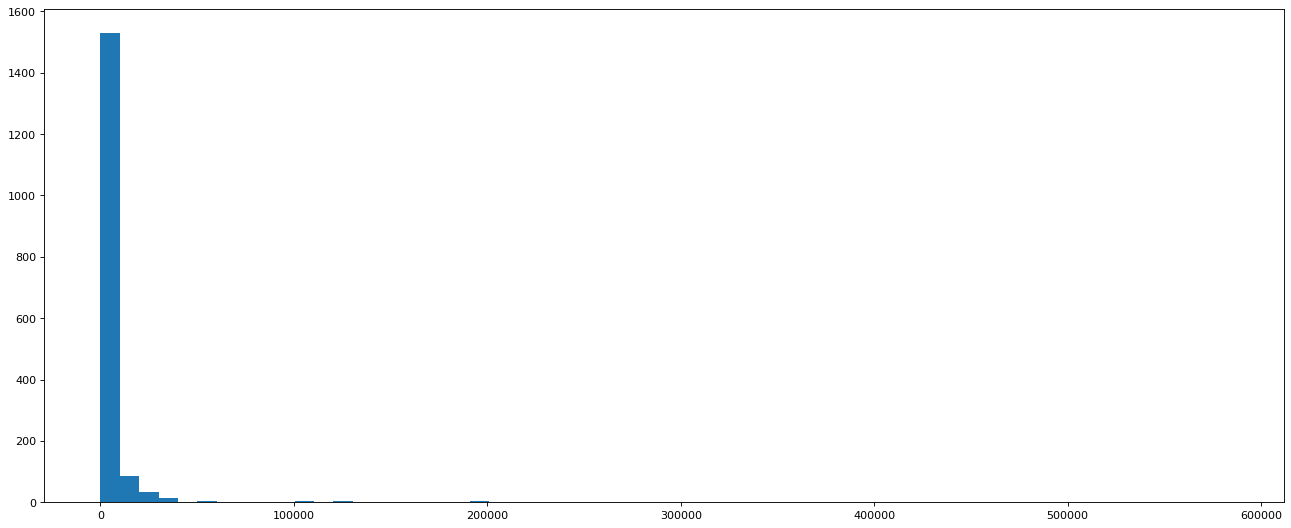

In [23]:
import numpy as np
from matplotlib import pyplot as plt

us_file_path = "./youtube_video_data/US_video_data_numbers.csv"
uk_file_path = "./youtube_video_data/GB_video_data_numbers.csv"

t_us = np.loadtxt(us_file_path, dtype="int", delimiter=",")

# 取评论的数据(最后一列)
t_us_comments = t_us[:, -1]

# 计算极差
print(t_us_comments.max(), t_us_comments.min())

# 设置组距并计算组数
d = 10000
bin_nums = (t_us_comments.max() - t_us_comments.min()) // d

plt.figure(figsize=(20, 8), dpi=80)
plt.hist(t_us_comments, bin_nums)
plt.show()

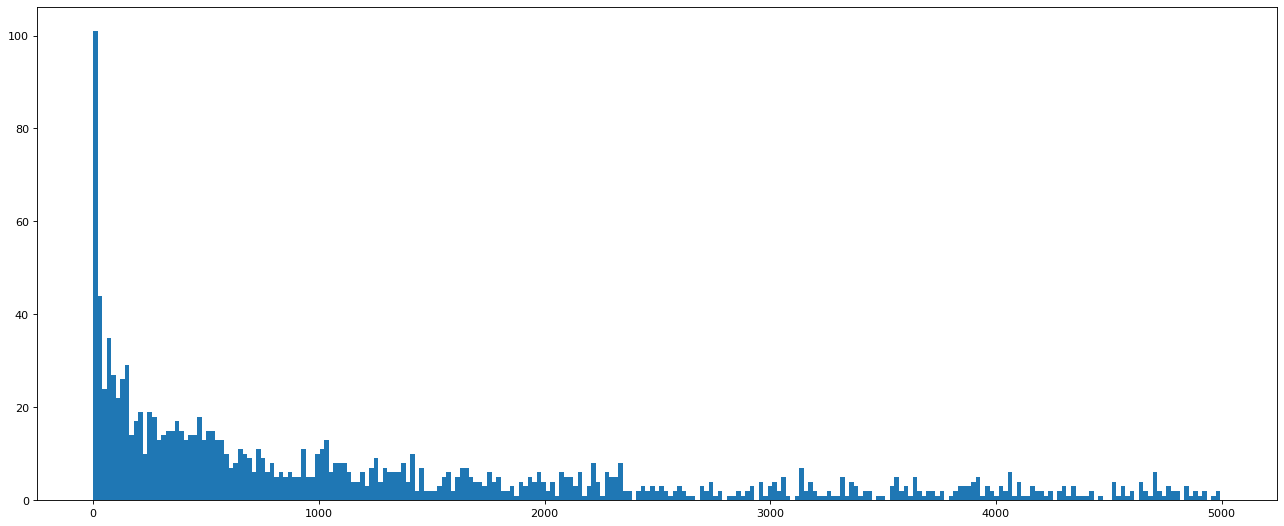

In [24]:
# 可以看到后面的数据比较小, 可以只选择比5000小的数据
t_us_comments = t_us_comments[t_us_comments<5000]

d = 20
bin_nums = (t_us_comments.max() - t_us_comments.min()) // d

plt.figure(figsize=(20, 8), dpi=80)
plt.hist(t_us_comments, bin_nums)
plt.show()

希望了解英国的youtube中视频的评论数和喜欢数的关系，应该如何绘制改图

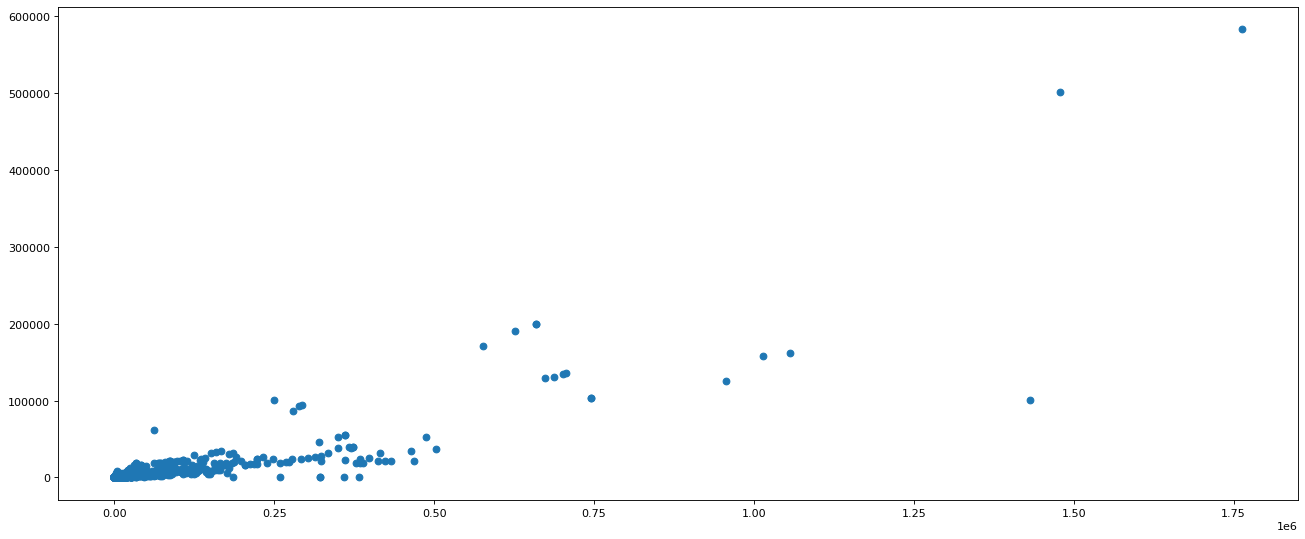

In [25]:
# 表示关系, 可以绘制散点图
uk_file_path = "./youtube_video_data/GB_video_data_numbers.csv"
t_uk = np.loadtxt(us_file_path, dtype="int", delimiter=",")

t_uk_comment = t_uk[:, 3]
t_uk_like = t_uk[:, 1]

plt.figure(figsize=(20, 8), dpi=80)
plt.scatter(t_uk_like, t_uk_comment)
plt.show()

In [ ]:
# 可以看出喜欢数量大于5e5的比较少
# 需要直接对t_uk进行选择, 而不是对like数进行选择
t_uk = t_uk[t_uk[:,1]<500000]

t_uk_comment = t_uk[:, 3]
t_uk_like = t_uk[:, 1]

plt.figure(figsize=(20, 8), dpi=80)
plt.scatter(t_uk_like, t_uk_comment)
plt.show()

In [ ]:
# 可以看到小于1e5的很密集
t_uk = t_uk[t_uk[:,1]<100000]

t_uk_comment = t_uk[:, 3]
t_uk_like = t_uk[:, 1]

plt.figure(figsize=(20, 8), dpi=80)
plt.scatter(t_uk_like, t_uk_comment)
plt.show()